# Dependencias

In [1]:
import numpy as np 
import pandas as pd

from datetime import datetime,date

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression, VarianceThreshold, SelectKBest
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from varclushi import VarClusHi
from scipy import stats

import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns

cf.go_offline()
pd.set_option('display.max_columns',None)

# Lectura de datos

In [2]:
ruta='/home/oscarjarillo/Documentos/Análisis Multivariado/Varios/House Price India.csv'
df=pd.read_csv(ruta)
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [3]:
df.shape

(14620, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [5]:
df.shape,df.drop_duplicates().shape

((14620, 23), (14620, 23))

# Definición de variables

In [6]:
um = ['id']
vart = ['Price']
varc = [v for v in df.columns if v not in um and v not in vart]

# Análisis exploratorio

## Valores nulos

In [7]:
nulos = 1-df.describe().T[['count']]/len(df)
nulos

,count
id,0.0
Date,0.0
number of bedrooms,0.0
number of bathrooms,0.0
living area,0.0
lot area,0.0
number of floors,0.0
waterfront present,0.0
number of views,0.0
condition of the house,0.0


In [8]:
fuera = [v for v in nulos.index if nulos['count'][0]>0]
fuera

[]

## Varianza nula

In [91]:
X = df.copy()

In [92]:
vt = VarianceThreshold()
vt.fit(X[varc])

VarianceThreshold()

In [93]:
fuera = [a for a,b in zip(varc,vt.get_support())if not b]
fuera

[]

## Multicolinealidad

In [94]:
vc = VarClusHi(df=X[varc],feat_list=varc).varclus().rsquare.sort_values(by=['Cluster','RS_Ratio']).reset_index(drop=True)
display(vc)
best = sorted(vc.groupby('Cluster').first()['Variable'])
best

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,living area,0.893893,0.133292,0.122425
1,0,Area of the house(excluding basement),0.831785,0.245026,0.222809
2,0,living_area_renov,0.704017,0.106606,0.331302
3,0,grade of the house,0.736817,0.230327,0.341941
4,0,number of bathrooms,0.692280,0.259314,0.415453
5,0,number of bedrooms,0.388885,0.021885,0.624789
6,0,Date,0.001429,0.000180,0.998751
7,1,number of views,0.675635,0.064267,0.346643
8,1,waterfront present,0.486773,0.006852,0.516768
9,1,Area of the basement,0.313686,0.068262,0.736596


['Built Year', 'Lattitude', 'living area', 'lot_area_renov', 'number of views']

## Selección de variables con mejor poder predictivo

In [95]:
sk = SelectKBest(k=len(best),score_func=f_regression)
sk.fit(X[best],X[vart[0]])

SelectKBest(k=5, score_func=<function f_regression at 0x7fc0498ed480>)

In [96]:
pd.DataFrame(zip(best,sk.scores_),columns=['var','score']).set_index('var').sort_values(by='score',
                                ascending=False).iplot(kind='bar',color='orange')

In [97]:
sk = SelectKBest(k=3,score_func=f_regression)
sk.fit(X[best],X[vart[0]])

SelectKBest(k=3, score_func=<function f_regression at 0x7fc0498ed480>)

In [98]:
best = [a for a,b in zip(best,sk.get_support())if b]
best

['Lattitude', 'living area', 'number of views']

## Valores extremos

array([[<AxesSubplot:title={'center':'Lattitude'}>,
        <AxesSubplot:title={'center':'living area'}>],
       [<AxesSubplot:title={'center':'number of views'}>, <AxesSubplot:>]],
      dtype=object)

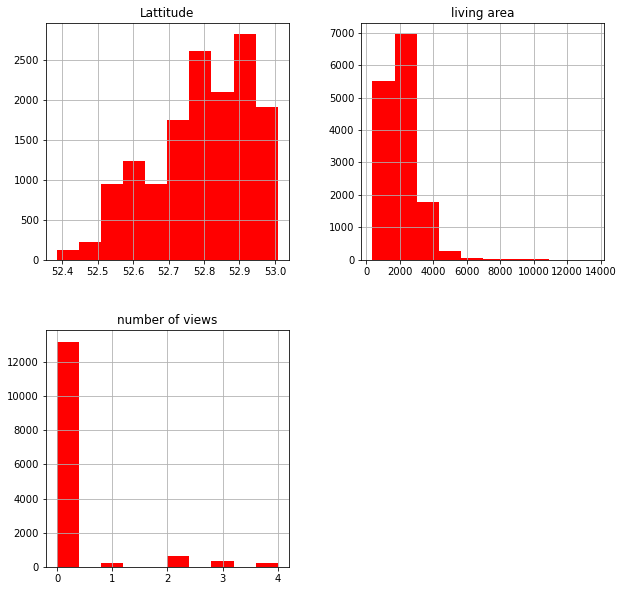

In [99]:
X[best].hist(figsize=(10,10),color='red')

In [100]:
for v,li,ls in X[best].describe(percentiles=[0.01,0.99]).T[['1%','99%']].reset_index().values:
    X[f'ex_{v}'] = ((X[v]<li)|(X[v]>ls)).astype(int)
X['ex_'] = X.filter(like='ex_').max(axis=1)
X['ex_'].value_counts(1)

0    0.96197
1    0.03803
Name: ex_, dtype: float64

In [101]:
for v,li,ls in X[best].describe(percentiles=[0.01,0.99]).T[['1%','99%']].reset_index().values:
    X.loc[X[v]<li,v]=np.nan
    X.loc[X[v]>ls,v]=np.nan

In [102]:
im = SimpleImputer(strategy='median')
im.fit(X[best])

SimpleImputer(strategy='median')

In [103]:
Xi = pd.DataFrame(im.transform(X[best]),columns=best)
Xi[um+vart] = X[um+vart]

In [104]:
ks = pd.DataFrame(map(lambda v:(v,stats.ks_2samp(Xi[v],X[v].dropna()).statistic),best),columns=['var','ks']).set_index('var')
ks.sort_values(by='ks',ascending=False,inplace=True)
ks

,ks
var,
Lattitude,0.009951
living area,0.009104
number of views,0.000000


In [105]:
best = [v for v in ks.index if ks['ks'][-1]<0.05]
best 

['Lattitude', 'living area', 'number of views']

array([[<AxesSubplot:title={'center':'Lattitude'}>,
        <AxesSubplot:title={'center':'living area'}>],
       [<AxesSubplot:title={'center':'number of views'}>, <AxesSubplot:>]],
      dtype=object)

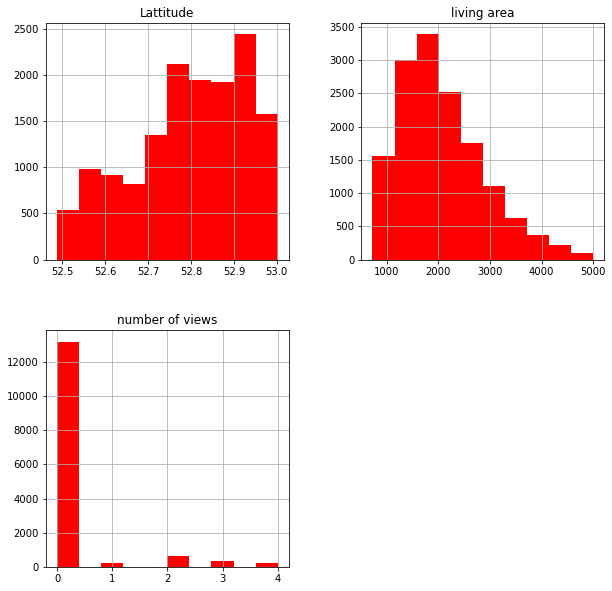

In [106]:
Xi[best].hist(figsize=(10,10),color='red')

## Cambio de espacio $\mathcal{X}_{[0,1]}$

In [107]:
sc = MinMaxScaler()
sc.fit(Xi[best])

MinMaxScaler()

In [108]:
X01 = pd.DataFrame(sc.transform(Xi[best]),columns=best)
X01[um+vart] = Xi[um+vart]

# Partición

In [109]:
Xt,Xv,yt,yv = train_test_split(X01[um+best],X01[um+vart],train_size=0.7)
Xt.reset_index(drop=True,inplace=True)
Xv.reset_index(drop=True,inplace=True)
yt.reset_index(drop=True,inplace=True)
yv.reset_index(drop=True,inplace=True)

# Aprendizaje

In [110]:
modelo = LinearRegression(n_jobs=-1)
modelo.fit(Xt[best],yt[vart[0]])

LinearRegression(n_jobs=-1)

In [111]:
modelo.coef_

array([392094.59306026, 911300.84257562, 540147.44847305])

In [112]:
modelo.intercept_

-13488.0861886387

## Validación del modelo

In [113]:
St = Xt.merge(yt,on=um,how='inner')
Sv = Xv.merge(yv,on=um,how='inner')

In [114]:
St['y^'] = modelo.predict(Xt[best])
Sv['y^'] = modelo.predict(Xv[best])

In [115]:
print(mean_absolute_error(y_pred=St['y^'],y_true=St[vart[0]]))
print(mean_absolute_error(y_pred=Sv['y^'],y_true=Sv[vart[0]]))

147098.24943562827
143548.29062869318


In [116]:
print(r2_score(y_pred=St['y^'],y_true=St[vart[0]]))
print(r2_score(y_pred=Sv['y^'],y_true=Sv[vart[0]]))

0.44465362747248016
0.48194497358010147


<AxesSubplot:ylabel='Density'>

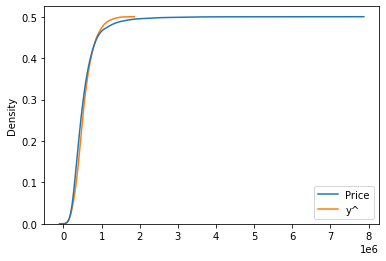

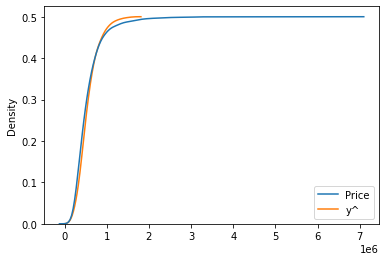

In [117]:
plt.figure()
sns.kdeplot(data=St[vart+['y^']],cumulative=True)
plt.figure()
sns.kdeplot(data=Sv[vart+['y^']],cumulative=True)

In [118]:
St.head()

,id,Lattitude,living area,number of views,Price,y^
0,6762813572,0.556765,0.453271,0.5,753888,887956.517947
1,6762821147,0.711703,0.254673,0.0,443000,497650.420088
2,6762810637,0.645218,0.656542,0.0,1400000,837805.625740
3,6762825036,0.994168,0.056075,0.0,349810,427420.778397
4,6762827685,0.156493,0.355140,0.5,287500,641585.249378


In [119]:
(St['y^']>St['Price']).to_frame().value_counts()

True     5832
False    4402
dtype: int64

In [122]:
St['y^'].sum()>=St['Price'].sum(), St['y^'].sum()-St['Price'].sum()

(True, 0.0)

In [121]:
St['y^'].sum(),St['Price'].sum()

(5505741667.0, 5505741667)